In [ ]:
import sympy as sym
import numpy as np
import math

from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML, Latex, Math

import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D

# Global Variables
#------------------------------------------------------------------------------#
# Input Power
H = 60000

# Max Speed of Gear 1
n1_v = 2700

# Maximum Speed of Gear 4
n4_max = 404

# Minimum Speed of Gear 4
n4_min = 396

# Vector of Possible Teeth Numbers for Gears 1 and 3
N1_vec = [17,19,23,29,31,37,41]

# Vector of Possible Teeth Numbers for Gear 2 and 4
N2_vec = [43,47,59,73,79,97,107]

# Vector of Possible Modules
m_vec = [5,6,8,10]

# Power To Torque
Torque = (60 * H) / (2 * np.pi * n1_v)


# Section 1: Gear Trains


[[-4.9931, -4.4675, -3.6905, -2.927, -2.7381, -2.2941, -2.0703], [-4.1609, -3.7229, -3.0755, -2.4392, -2.2818, -1.9118, -1.7253], [-3.1207, -2.7922, -2.3066, -1.8294, -1.7113, -1.4338, -1.2939], [-2.4965, -2.2338, -1.8453, -1.4635, -1.3691, -1.1471, -1.0352]]


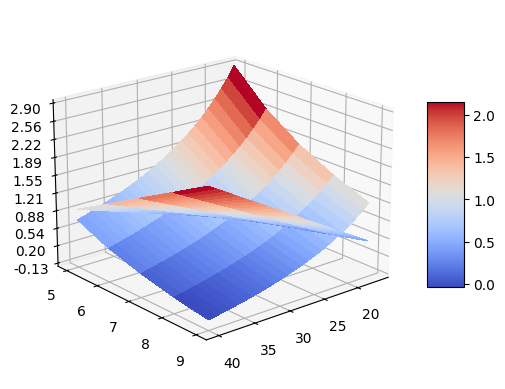

In [ ]:
# Section 1: Gear Trains
#------------------------------------------------------------------------------#
# Helper Functions
def optimal_selection(N_v,m_v,T):

  Wt_vect = [[round(((-T / ((N*m)/2))),4) for N in N_v] for m in m_v]
  d_vect = [[N*m for N in N_v] for m in m_v]

  m_v = np.arange(m_v[0],m_v[-1],1)
  N_v = np.arange(N_v[0],N_v[-1],1)

  N_v, m_v = np.meshgrid(N_v, m_v)

  Wt_v = T / ((N_v * m_v) / 2)
  d_v = N_v * m_v / 1000

  zero_plane = 0 * N_v * m_v

  # Combine vectors to compute global mean and standard deviation
  combined1 = np.concatenate([Wt_v, zero_plane])
  combined2 = np.concatenate([d_v, zero_plane])
  mean1 = np.mean(combined1)
  mean2 = np.mean(combined2)
  std1 = np.std(combined1)
  std2 = np.std(combined2)

  # Standardize each vector
  Wt_v_s = (Wt_v - mean1) / std1
  d_v_s = (d_v - mean2) / std2

  POI = []

  for i in range(len(Wt_v_s)):
    for j in range(len(Wt_v_s[0])):
      if abs(Wt_v_s[i][j] - d_v_s[i][j]) < 0.1:
        POI.append([N_v[i,j],m_v[i,j],Wt_v_s[i,j]])

  # Plots the Planes
  fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

  surf = ax.plot_surface(N_v, m_v, Wt_v_s, cmap=cm.coolwarm, linewidth=0, antialiased=False)
  surf = ax.plot_surface(N_v, m_v, d_v_s, cmap=cm.coolwarm, linewidth=0, antialiased=False)

  # Customize the z axis.
  ax.zaxis.set_major_locator(LinearLocator(10))

  # A StrMethodFormatter is used automatically
  ax.zaxis.set_major_formatter('{x:.02f}')

  # Add a color bar which maps values to colors.
  fig.colorbar(surf, shrink=0.5, aspect=5)

  ax.view_init(elev=20, azim=50)

  return Wt_vect,d_vect
#------------------------------------------------------------------------------#
# Vectors of Tangential Forces and Diameters on N1 and N2
Wt_vec, d_vec  = optimal_selection(N1_vec,m_vec,Torque)

#Section 2: Shear and Moment Calculations

length 344
length 248
length 344
Statics Equations for Shaft 1: 


Eq(0, A_z + B_z + W_t1 + W_tI)

Eq(0, A_y + B_y + W_r1 + W_rI)

Eq(0, 237.0*B_z + 58.5*W_t1 - 58.5*W_tI)

Eq(0, 237.0*B_y + 58.5*W_r1 - 58.5*W_rI)



Max Moment 1: 213.4489
Max Shear 1: 3.2317
Critical Cross-Section 1: 152.9776334776335


Statics Equations for Shaft 2: 


Eq(0, C_z + D_z + W_t2 + W_t3)

Eq(0, C_y + D_y + W_r2 + W_r3)

Eq(0, 223.0*D_z + 58.5*W_t2 + 152.5*W_t3)

Eq(0, 223.0*D_y + 58.5*W_r2 + 152.5*W_r3)



Max Moment 2: 322.9616
Max Shear 2: 4.5828
Critical Cross-Section 2: 165.02813852813853


Statics Equations for Shaft 3: 


Eq(0, E_z + F_z + W_t4 + W_tO)

Eq(0, E_y + F_y + W_r4 + W_rO)

Eq(0, 213.0*F_z + 142.5*W_t4 - 82.5*W_tO)

Eq(0, 213.0*F_y + 142.5*W_r4 - 82.5*W_rO)



Max Moment 3: 472.6463
Max Shear 3: 6.7043
Critical Cross-Section 3: 261.0007215007215




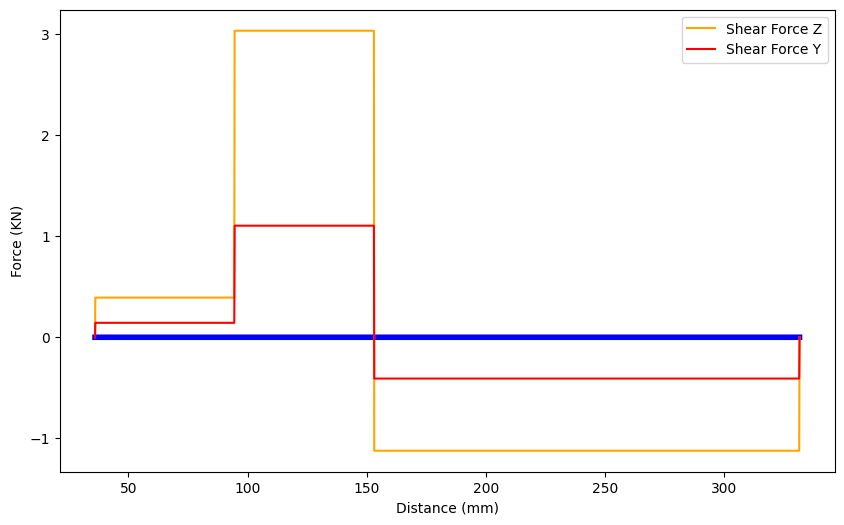

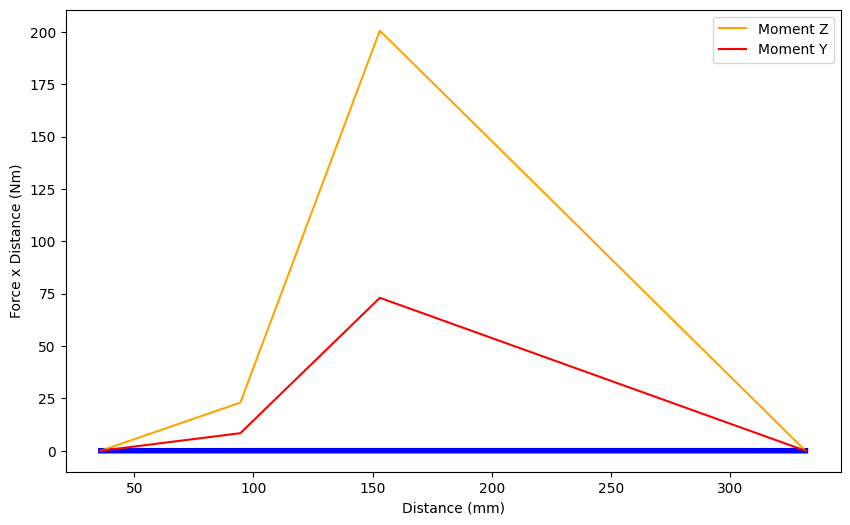

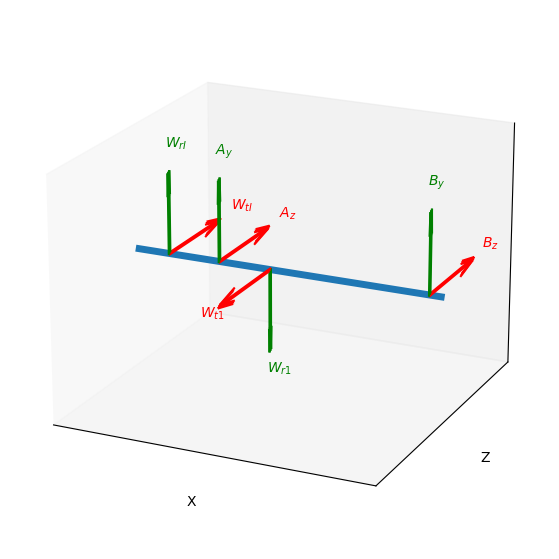

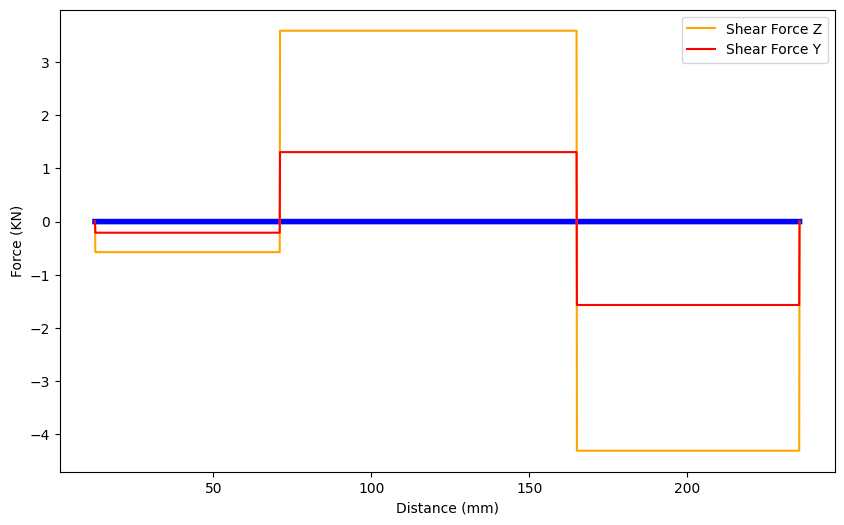

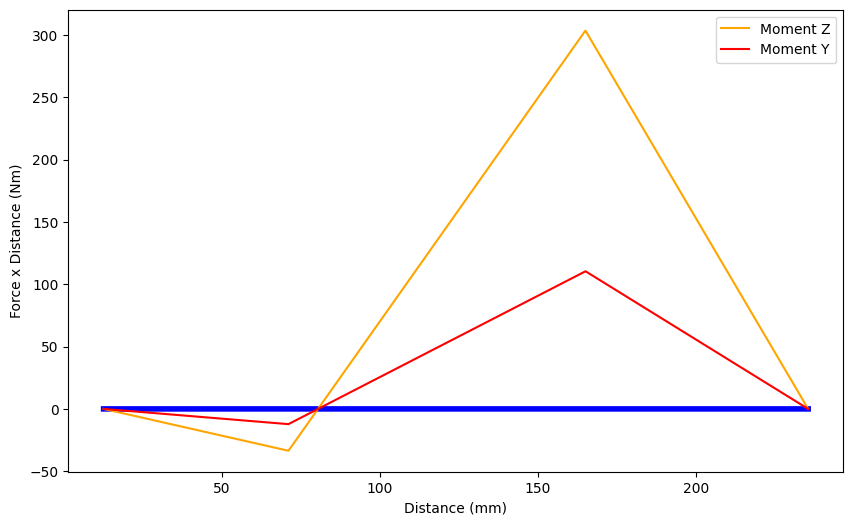

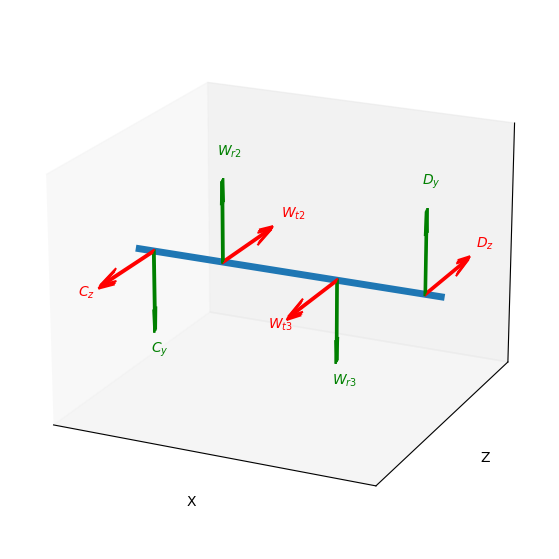

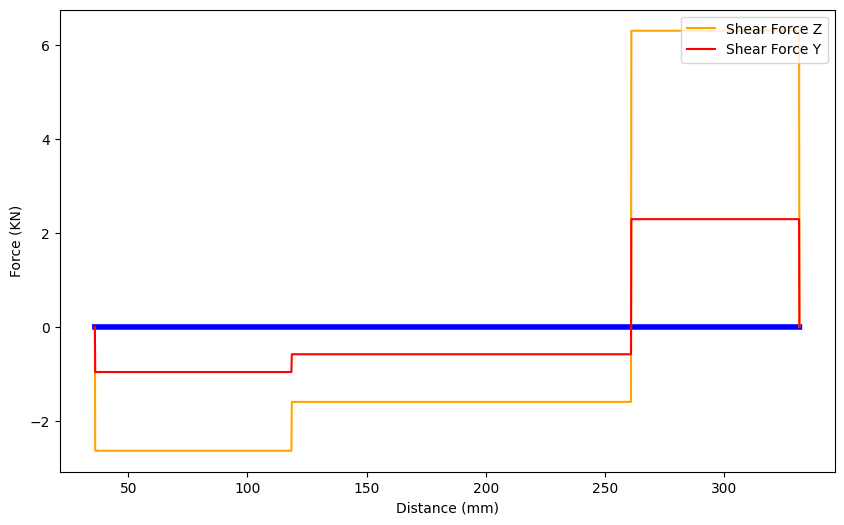

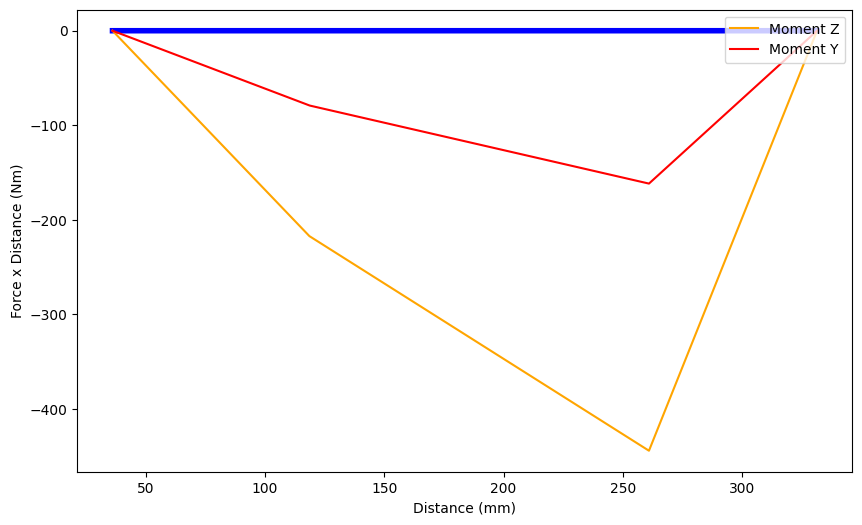

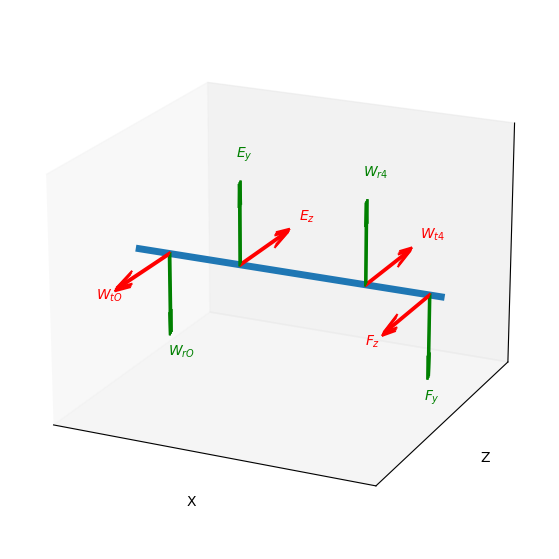

In [ ]:
# Section 2: Shear and Moment Calculations
#------------------------------------------------------------------------------#
# Current Gear Teeth
N1 = 17
N2 = 43
N3 = 17
N4 = 45

# Modules
m1 = 6
m2 = 8

# Torque
T1 = Torque

# Pressure Angle
p_angle = 20

# Gear Face Widths
bw1 = 12 * m1
bw2 = 12 * m2

# Bearing Widths

B_width1 = 25
B_width2 = 25

# Length of Shafts
L1 = bw2 + 30 + bw1 + bw2 + B_width1 + B_width2

# Length of Shafts
L2 = 30 + bw1 + bw2 + B_width1 + B_width2

# Length of Shafts
L3 = bw1 + 30 + bw2 + bw2 + B_width1 + B_width2

print("length "+str(L1))
print("length "+str(L2))
print("length "+str(L3))

#------------------------------------------------------------------------------#
# Helper Functions
def two_point_force(F1,F1pos,F2,F2pos,F3,F3pos,F4,F4pos):
  x1f = np.linspace(F1pos, F4pos, 2080)
  Vf =[]
  Mf =[]
  maxM = 0
  critCross = 0
  for x in x1f:
    # Set Shear and Moment to Zero at Start and End
    if (x < F2pos and x == F1pos) or (x > F3pos and x == F4pos):
      Vf.append(0)
      Mf.append(0)
    # Calculate Moment and Shear from First Force Application
    elif(x < F2pos):
      Vf.append(F1)
      Mf.append((F1 * (x - F1pos)))
    # Calculate Moment and Shear between Second and Third Force Application
    elif(x == F2pos or x > F2pos) and (x == F3pos or x < F3pos):
      Vf.append(F1 + F2)
      Mf.append(F1 * (x - F1pos) + F2 * (x - F2pos))
    # Calculate Moment and Shear after Third Force Application
    elif(x > F2pos and x > F3pos):
      Vf.append(F1 + F2 + F3)
      Mf.append(F1 * (x - F1pos) + F2 * (x - F2pos) + F3 * (x - F3pos))

  if max(Mf) < abs(min(Mf)):
    maxM = min(Mf)
  else:
    maxM = max(Mf)
  critCross = x1f[Mf.index(maxM)]

  return Vf,Mf,critCross

# Generates the Absolute Max Moment On Shaft
def abs_max_moment(M1_lst,M2_lst):
  if abs(min(M1_lst)) > max(M1_lst):
    m1 = min(M1_lst)
  else:
    m1 = max(M1_lst)
  if abs(min(M2_lst)) > max(M2_lst):
    m2 = min(M2_lst)
  else:
    m2 = max(M2_lst)
  return round(math.sqrt(m1**2 + m2**2),4)

# Generates the Absolute Max Shear Force On Shaft
def abs_max_shear(V1_lst,V2_lst):
  if abs(min(V1_lst)) > max(V1_lst):
    v1 = min(V1_lst)
  else:
    v1 = max(V1_lst)
  if abs(min(V2_lst)) > max(V2_lst):
    v2 = min(V2_lst)
  else:
    v2 = max(V2_lst)
  return round(math.sqrt(v1**2 + v2**2),4)

# Plots Free Body Diagrams
def free_body_diagram(ax, shaft_pos, shaft_length, forces, vect_len, offsets, arrow_length_ratio, title):

    # Plot the Shaft
    x = [shaft_pos, shaft_pos + shaft_length]
    y = [0, 0]
    z = [0, 0]
    ax.plot(x, y, z, linewidth=5)

    # Plot forces
    for pos, x_dir, y_dir, z_dir, color, label in forces:
        # Plot thick arrows
        for offset in offsets:
            ax.quiver(
                pos + offset,
                offset, offset,
                x_dir, y_dir, z_dir,
                length=vect_len,
                normalize=True,
                color=color,
                arrow_length_ratio=arrow_length_ratio
            )
        ax.text(
            pos - 4,
            (vect_len + 2) * np.sign(float(y_dir)),
            (vect_len + 2) * np.sign(float(z_dir)),
            label,
            color=color
        )

    # Adjust View
    ax.view_init(elev=20, azim=-65)
    ax.set_xlim(shaft_pos, shaft_pos + shaft_length)
    ax.set_ylim(-10, 10)
    ax.set_zlim(-10, 10)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')
    fig.savefig('/content/Final Proj/' + str(title))

#------------------------------------------------------------------------------#
# Shaft 1 Considerations

# Tangential Force 1
Wt1 = Wt_vec[m_vec.index(m1)][N1_vec.index(N1)]
WtI = T1 / (45*6)/2
# Radial Force 1
Wr1 = Wt1 * np.tan(p_angle * np.pi/180)
WrI = WtI * np.tan(p_angle * np.pi/180)
# Pitch Diameter 1
dp1 = N1 * m1

# Symbolic Variables for Gear Forces 1
Wt1s = sym.symbols('W_t1')
Wr1s = sym.symbols('W_r1')
# Symbolic Variables for Gear Forces Input
WtIs = sym.symbols('W_tI')
WrIs = sym.symbols('W_rI')

# Bearing 1-1 Z and Y Reactions
Br1z1 = sym.symbols('A_z')
Br1y1 = sym.symbols('A_y')
# Bearing 1-2 Z and Y Reactions
Br1z2 = sym.symbols('B_z')
Br1y2 = sym.symbols('B_y')



# Input Gear Pos
GI_pos = bw1/2
# Bearing 1-1 Position
B1_pos = bw1 + 10 + B_width1 / 2
# Bearing 1-2 Position
B2_pos = L1 - (B_width1 / 2)
# Gear 1 Position
G1_pos = bw1 + 10 + B_width1 + 10 + bw1/2
# Gear 1 Relative to Bearing 1-1
B1_G1 = G1_pos - B1_pos
# Bearing 1-2 Relative to Bearing 1-1
B1_B2 = B2_pos - B1_pos
# Gear Input Relative to Bearing 1-1
B1_GI = GI_pos - B1_pos

# Equilibrium Equations to Solve Statics
Fz = sym.Eq(0, Br1z1 + Wt1s + Br1z2 + WtIs)
Fy = sym.Eq(0, Br1y1 + Wr1s + Br1y2 + WrIs)
M_abty = sym.Eq(0, Wt1s * B1_G1 + Br1z2 * B1_B2 + WtIs * B1_GI)
M_abtx = sym.Eq(0, Wr1s * B1_G1 + Br1y2 * B1_B2 + WrIs * B1_GI)


# Solution Generation
print('\033[97;1mStatics Equations for Shaft 1: ')
display(Fz)
display(Fy)
display(M_abty)
display(M_abtx)
print('\n')

# Equations for Latex
Fz_l = sym.latex(Fz)
Fy_l = sym.latex(Fy)
M_abty_l = sym.latex(M_abty)
M_abtx_l = sym.latex(M_abtx)

# Substitutions to Symbolic Solutions
Fz = Fz.subs({Wt1s:Wt1,Wr1s:Wr1,WtIs:WtI,WrIs:WrI})
Fy = Fy.subs({Wt1s:Wt1,Wr1s:Wr1,WtIs:WtI,WrIs:WrI})
M_abty = M_abty.subs({Wt1s:Wt1,Wr1s:Wr1,WtIs:WtI,WrIs:WrI})
M_abtx = M_abtx.subs({Wt1s:Wt1,Wr1s:Wr1,WtIs:WtI,WrIs:WrI})
# Solution to Statics for Shaft 1
statics1 = np.array([Fz,Fy,M_abty,M_abtx])
bear1_rxs = sym.solve(statics1)


# Uncomment This to See Bearing Reactions on Shaft 1
#display(bear1_rxs)

# Generating Shear Forces and Moments in Y and Z Directions
x1 = np.linspace(GI_pos, B2_pos, 2080)

V1z, M1z, Cz1 = two_point_force(WtI,GI_pos,bear1_rxs[Br1z1],B1_pos,Wt1,G1_pos,bear1_rxs[Br1z2],B2_pos)
V1y, M1y, Cy1 = two_point_force(WrI,GI_pos,bear1_rxs[Br1y1],B1_pos,Wr1,G1_pos,bear1_rxs[Br1y2],B2_pos)

M1_max = abs_max_moment(M1z,M1y)
V1_max = abs_max_shear(V1z,V1y)

plt.figure(figsize=(10,6))
plt.plot(x1, [0] * len(V1z), linewidth=4.0, color='blue')
plt.plot(x1, V1z, color='orange', label="Shear Force Z")
plt.plot(x1, V1y, color='red', label="Shear Force Y")
plt.xlabel("Distance (mm)")
plt.ylabel("Force (KN)")
plt.legend(loc='upper right')
plt.savefig('/content/Final Proj/Shaft 1 Shear Diagram.png')

plt.figure(figsize=(10,6))
plt.plot(x1, [0] * len(M1z), linewidth=4.0, color='blue')
plt.plot(x1, M1z, color='orange', label="Moment Z")
plt.plot(x1, M1y, color='red', label="Moment Y")
plt.xlabel("Distance (mm)")
plt.ylabel("Force x Distance (Nm)")
plt.legend(loc='upper right')
plt.savefig('/content/Final Proj/Moment Shaft 1.png')

# Shaft 1 Forces
forces_shaft1 = [
    (GI_pos, 0, WtI, 0, 'r', r'$W_{tI}$'),
    (GI_pos, 0, 0, WrI, 'g', r'$W_{rI}$'),
    (B1_pos, 0, bear1_rxs[Br1z1], 0, 'r', r'$A_{z}$'),
    (B1_pos, 0, 0, bear1_rxs[Br1y1], 'g', r'$A_{y}$'),
    (G1_pos, 0, Wt1, 0, 'r', r'$W_{t1}$'),
    (G1_pos, 0, 0, Wr1, 'g', r'$W_{r1}$'),
    (B2_pos, 0, bear1_rxs[Br1z2], 0, 'r', r'$B_{z}$'),
    (B2_pos, 0, 0, bear1_rxs[Br1y2], 'g', r'$B_{y}$')
]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
vect_len = 7
offsets = [-0.1, 0, 0.1]
arrow_length_ratio = 0.3
free_body_diagram(ax, 0, L1, forces_shaft1, vect_len, offsets, arrow_length_ratio, "FBD Shaft 1.png")


print('Max Moment 1: ' + str(M1_max) + '\nMax Shear 1: ' + str(V1_max) + '\nCritical Cross-Section 1: ' + str(Cz1) )
print('\n')
#------------------------------------------------------------------------------#
# Shaft 2 Considerations

# Gear 2 Values
Wt2 = -Wt1
Wr2 = -Wr1
dp2 = N2 * m1
T2 = Wt2 * (dp2/2)

# Gear 3 Values
T3 = -T2
dp3 = N3 * m2
Wt3 = T3 / (dp3/2)
Wr3 = Wt3 * np.tan(p_angle * np.pi/180)


# Symbolic Variables for Gear Forces 2
Wt2s = sym.symbols('W_t2')
Wr2s = sym.symbols('W_r2')
# Symbolic Variables for Gear Forces 3
Wt3s = sym.symbols('W_t3')
Wr3s = sym.symbols('W_r3')

# Bearing 2-1 Z and Y Reactions
Br2z1 = sym.symbols('C_z')
Br2y1 = sym.symbols('C_y')
# Bearing 2-2 Z and Y Reactions
Br2z2 = sym.symbols('D_z')
Br2y2 = sym.symbols('D_y')


# Bearing 2-1 Position
B21_pos = B_width1 / 2
# Bearing 2-2 Position
B22_pos = L2 - B_width1 / 2
# Gear 2 Position
G2_pos = B_width1 + 10 + bw1/2
# Gear 3 Position
G3_pos = L2 - B_width1 - 10 - bw2/2


# Gear 2 Relative to Bearing 2-1
B21_G2 = G2_pos - B21_pos
# Gear 3 Relative to Bearing 2-1
B21_G3 = G3_pos - B21_pos
# Bearing 2-2 Relative to Bearing 2-1
B21_B22 = B22_pos - B21_pos


# Equilibrium Equations to Solve Statics
Fz2 = sym.Eq(0, Br2z1 + Wt2s + Br2z2 + Wt3s)
Fy2 = sym.Eq(0, Br2y1 + Wr2s + Br2y2 + Wr3s)
M_abty2 = sym.Eq(0, Wt2s * B21_G2 + Wt3s * B21_G3 + Br2z2 * B21_B22)
M_abtx2 = sym.Eq(0, Wr2s * B21_G2 + Wr3s * B21_G3 + Br2y2 * B21_B22)

# Equations for Latex
Fz_l2 = sym.latex(Fz2)
Fy_l2 = sym.latex(Fy2)
M_abty_l2 = sym.latex(M_abty2)
M_abtx_l2 = sym.latex(M_abtx2)

# Solution Generation
print('\033[97;1mStatics Equations for Shaft 2: ')
display(Fz2)
display(Fy2)
display(M_abty2)
display(M_abtx2)
print('\n')

# Equations for Latex
Fz2_l = sym.latex(Fz)
Fy2_l = sym.latex(Fy)
M_abty2_l = sym.latex(M_abty)
M_abtx2_l = sym.latex(M_abtx)

# Substitutions to Symbolic Solutions
Fz2 = Fz2.subs({Wt2s:Wt2,Wr2s:Wr2,Wt3s:Wt3,Wr3s:Wr3})
Fy2 = Fy2.subs({Wt2s:Wt2,Wr2s:Wr2,Wt3s:Wt3,Wr3s:Wr3})
M_abty2 = M_abty2.subs({Wt2s:Wt2,Wr2s:Wr2,Wt3s:Wt3,Wr3s:Wr3})
M_abtx2 = M_abtx2.subs({Wt2s:Wt2,Wr2s:Wr2,Wt3s:Wt3,Wr3s:Wr3})
# Solution to Statics for Shaft 2
statics2 = np.array([Fz2,Fy2,M_abty2,M_abtx2])
bear2_rxs = sym.solve(statics2)

# Uncomment This to See Bearing Reactions on Shaft 2
# display(bear2_rxs)

x2 = np.linspace(B21_pos, B22_pos, 2080)
V2z, M2z, Cz2 = two_point_force(bear2_rxs[Br2z1],B21_pos,Wt2,G2_pos,Wt3,G3_pos,bear2_rxs[Br2z2],B22_pos)
V2y, M2y, Cy2 = two_point_force(bear2_rxs[Br2y1],B21_pos,Wr2,G2_pos,Wr3,G3_pos,bear2_rxs[Br2y2],B22_pos)

M2_max = abs_max_moment(M2z,M2y)
V2_max = abs_max_shear(V2z,V2y)

plt.figure(figsize=(10,6))
plt.plot(x2, [0] * len(V2z), linewidth=4.0, color='blue')
plt.plot(x2, V2z, color='orange', label="Shear Force Z")
plt.plot(x2, V2y, color='red', label="Shear Force Y")
plt.xlabel("Distance (mm)")
plt.ylabel("Force (KN)")
plt.legend(loc='upper right')
plt.savefig('/content/Final Proj/Shaft 2 Shear.png')

plt.figure(figsize=(10,6))
plt.plot(x2, [0] * len(M2z), linewidth=4.0, color='blue')
plt.plot(x2, M2z, color='orange', label="Moment Z")
plt.plot(x2, M2y, color='red', label="Moment Y")
plt.xlabel("Distance (mm)")
plt.ylabel("Force x Distance (Nm)")
plt.legend(loc='upper right')
plt.savefig('/content/Final Proj/Shaft 2 Moment.png')

# Shaft 2 Forces
forces_shaft2 = [
    (B21_pos, 0, bear2_rxs[Br2z1], 0, 'r', r'$C_{z}$'),
    (B21_pos, 0, 0, bear2_rxs[Br2y1], 'g', r'$C_{y}$'),
    (G2_pos, 0, Wt2, 0, 'r', r'$W_{t2}$'),
    (G2_pos, 0, 0, Wr2, 'g', r'$W_{r2}$'),
    (G3_pos, 0, Wt3, 0, 'r', r'$W_{t3}$'),
    (G3_pos, 0, 0, Wr3, 'g', r'$W_{r3}$'),
    (B22_pos, 0, bear2_rxs[Br2z2], 0, 'r', r'$D_{z}$'),
    (B22_pos, 0, 0, bear2_rxs[Br2y2], 'g', r'$D_{y}$')
]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
vect_len = 7
offsets = [-0.1, 0, 0.1]
arrow_length_ratio = 0.3
free_body_diagram(ax, 0, L2, forces_shaft2, vect_len, offsets, arrow_length_ratio, "FBD Shaft 2.png")

print('Max Moment 2: ' + str(M2_max) + '\nMax Shear 2: ' + str(V2_max) + '\nCritical Cross-Section 2: '  + str(Cz2))
print('\n')
#------------------------------------------------------------------------------#
# Shaft 3 Considerations

# Gear 4 Values
Wt4 = -Wt3
Wr4 = -Wr3
dp4 = N4 * m2
T4 = Wt4 * (dp4/2)

# Gear 4 Output Values
WtO = -T4 / (45*6)/2
WrO = WtO * np.tan(p_angle * np.pi/180)

# Symbolic Variables for Gear Forces 4
Wt4s = sym.symbols('W_t4')
Wr4s = sym.symbols('W_r4')
# Symbolic Variables for Gear Forces Output
WtOs = sym.symbols('W_tO')
WrOs = sym.symbols('W_rO')

# Bearing 3-1 Z and Y Reactions
Br3z1 = sym.symbols('E_z')
Br3y1 = sym.symbols('E_y')
# Bearing 3-2 Z and Y Reactions
Br3z2 = sym.symbols('F_z')
Br3y2 = sym.symbols('F_y')

# Bearing 3-1 Position
B31_pos = bw2 + 10 + B_width1 / 2
# Bearing 3-2 Position
B32_pos = L3 - B_width1 / 2
# Gear 4 Position
G4_pos = L3 - B_width1 - 10 - bw2/2
# Gear Output Position
GO_pos = bw1/2

# Gear 4 Relative to Bearing 3-1
B31_G4 = G4_pos - B31_pos
# Gear Output Relative to Bearing 3-1
B31_GO = GO_pos - B31_pos
# Bearing 3-2 Relative to Bearing 3-1
B31_B32 = B32_pos - B31_pos

# Equilibrium Equations to Solve Statics
Fz3 = sym.Eq(0, Br3z1 + Wt4s + Br3z2 + WtOs)
Fy3 = sym.Eq(0, Br3y1 + Wr4s + Br3y2 + WrOs)
M_abty3 = sym.Eq(0, Wt4s * B31_G4 + Br3z2 * B31_B32 + WtOs * B31_GO)
M_abtz3 = sym.Eq(0, Wr4s * B31_G4 + Br3y2 * B31_B32 + WrOs * B31_GO)

# Equations for Latex
Fz_l3 = sym.latex(Fz3)
Fy_l3 = sym.latex(Fy3)
M_abty_l3 = sym.latex(M_abty3)
M_abtx_l3 = sym.latex(M_abtz3)


# Solution Generation
print('\033[97;1mStatics Equations for Shaft 3: ')
display(Fz3)
display(Fy3)
display(M_abty3)
display(M_abtz3)
print('\n')

# Equations for Latex
Fz3_l = sym.latex(Fz)
Fy3_l = sym.latex(Fy)
M_abty3_l = sym.latex(M_abty)
M_abtx3_l = sym.latex(M_abtx)

# Substitutions to Symbolic Solutions
Fz3 = Fz3.subs({Wt4s:Wt4,Wr4s:Wr4,WtOs:WtO,WrOs:WrO})
Fy3 = Fy3.subs({Wt4s:Wt4,Wr4s:Wr4,WtOs:WtO,WrOs:WrO})
M_abty3 = M_abty3.subs({Wt4s:Wt4,Wr4s:Wr4,WtOs:WtO,WrOs:WrO})
M_abtz3 = M_abtz3.subs({Wt4s:Wt4,Wr4s:Wr4,WtOs:WtO,WrOs:WrO})
# Solution to Statics for Shaft 3
statics3 = np.array([Fz3,Fy3,M_abty3,M_abtz3])
bear3_rxs = sym.solve(statics3)

# Uncomment This to See Bearing Reactions on Shaft 3
#display(bear3_rxs)

x3 = np.linspace(GO_pos, B32_pos, 2080)
V3z, M3z, Cz3 = two_point_force(WtO,GO_pos,bear3_rxs[Br3z1],B31_pos,Wt4,G4_pos,bear3_rxs[Br3z2],B32_pos)
V3y, M3y, Cy3 = two_point_force(WrO,GO_pos,bear3_rxs[Br3y1],B31_pos,Wr4,G4_pos,bear3_rxs[Br3y2],B32_pos)

M3_max = abs_max_moment(M3z,M3y)
V3_max = abs_max_shear(V3z,V3y)

plt.figure(figsize=(10,6))
plt.plot(x3, [0] * len(V3z), linewidth=4.0, color='blue')
plt.plot(x3, V3z, color='orange', label="Shear Force Z")
plt.plot(x3, V3y, color='red', label="Shear Force Y")
plt.xlabel("Distance (mm)")
plt.ylabel("Force (KN)")
plt.legend(loc='upper right')
plt.savefig('/content/Final Proj/Shaft 3 Shear.png')

plt.figure(figsize=(10,6))
plt.plot(x3, [0] * len(M3z), linewidth=4.0, color='blue')
plt.plot(x3, M3z, color='orange', label="Moment Z")
plt.plot(x3, M3y, color='red', label="Moment Y")
plt.xlabel("Distance (mm)")
plt.ylabel("Force x Distance (Nm)")
plt.legend(loc='upper right')
plt.savefig('/content/Final Proj/Shaft 3 Moment.png')


# Shaft 3 Forces
forces_shaft3 = [
    (GO_pos, 0, WtO, 0, 'r', r'$W_{tO}$'),
    (GO_pos, 0, 0, WrO, 'g', r'$W_{rO}$'),
    (B31_pos, 0, bear3_rxs[Br3z1], 0, 'r', r'$E_{z}$'),
    (B31_pos, 0, 0, bear3_rxs[Br3y1], 'g', r'$E_{y}$'),
    (G4_pos, 0, Wt4, 0, 'r', r'$W_{t4}$'),
    (G4_pos, 0, 0, Wr4, 'g', r'$W_{r4}$'),
    (B32_pos, 0, bear3_rxs[Br3z2], 0, 'r', r'$F_{z}$'),
    (B32_pos, 0, 0, bear3_rxs[Br3y2], 'g', r'$F_{y}$')
]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
vect_len = 7
offsets = [-0.1, 0, 0.1]
arrow_length_ratio = 0.3
free_body_diagram(ax, 0, L3, forces_shaft3, vect_len, offsets, arrow_length_ratio, "FBD Shaft 3.png")

print('Max Moment 3: ' + str(M3_max) + '\nMax Shear 3: ' + str(V3_max) + '\nCritical Cross-Section 3: ' + str(Cz3))
print('\n')




#Section 3: Shaft Geometries

In [ ]:
# Section 3: Shaft Geometries
#------------------------------------------------------------------------------#
# Helper Functions

def fatigue_strength(UTS, N):
  """
    Calculate the Fatigue Strength.
    Parameters:
    UTS (int): Ultimate Tensile Strength
    N (int): Number of Cycles

    Returns:
    float: Fatigue Strength
    """
  SL = 0.9 * UTS
  Se = 0.5 * UTS
  b = -(1/3) * math.log10(SL / Se)
  c = math.log10((SL**2)/Se)
  return (10**c)*(N**b)

def factors_for_shaft(UTS, d, n, kc, kcs):
  """
    Calculate Factors for Shaft Design.
    Parameters:
    UTS (int): Ultimate Tensile Strength
    d (int): Diameter
    n (int): RPM of Shaft
    kc (float): Stress Concentration
    kcs (float): Shear Stress Concentration

    Returns:
    vect: Factors for Shaft Design
    """

  Kf = 1+ 0.8 * (kc - 1) # q is 0.8 per book
  Kfs = 1+ 0.8 * (kcs - 1)# q is 0.8 per book
  NoC = 5 * 8 * 365 * 60 * n   # Cycle Factor
  kf = 4.51 * UTS**(-0.265)    # surface factor - Machining/Cold Drawing
  ks = 1.189 * d **(-0.112) # size factor - have inputs
  kr = 0.82 # reliability factor
  kt = 1 # temperature factor
  km = 1 # misc factors
  return kf, ks, kr, kt, km, NoC, Kf, Kfs

def bending_stress_shaft(M,d_i):
  return (32 * M) / (np.pi * (d_i/1000)**3) / 10**6

def torsional_stress(T,d_i):
  return (16 * T) / (np.pi * (d_i/1000)**3) / 10**6

def transverse_stress(V,d_i):
  return (16 * V * 1000) / (3 * np.pi * (d_i/1000)**2) / 10**6

def factor_of_safety(bs,xs,ts,tss,Kf,Kfs,kf,kt,ks,kr,km,Sf,UTS):
  return 1/((math.sqrt( (Kf*bs)**2  + 3*(Kfs*ts)**2 )/(kf*ks*kr*kt*km*Sf)) + (math.sqrt((xs)**2  + 3*(tss)**2 )/UTS))

def yield_factor_of_saftey(bs,xs,ts,tss,Sy):
  return Sy / math.sqrt((bs + xs)**2 + 3*(tss + ts)**2)
#------------------------------------------------------------------------------#
# Shaft 1 Considerations

# Material (AISI 415 S41500)
UTS = 900
Sy = 700

FS = 1.27
Tall = (0.577 * Sy) / FS * 10**6

dmin_1_1 = (np.cbrt((16 * T1) / (np.pi * Tall))) * 1000

d1 = 40

bs1 = bending_stress_shaft(M1_max,d1)
ts1 = torsional_stress(T1,d1)
tss1 = transverse_stress(V1_max,d1)
xs1 = 0

# STRES CONCENTRATIONS (MANUAL CALCULATION)
kc1 = 2.1 # stress concentration factor for bending
kcs1 = 1.5 # stress concentration factor for shear (torsional)

# Material Property Factors
kf1, ks1, kr1, kt1, km1, NoC1, Kf1, Kfs1 = factors_for_shaft(UTS, d1, n1_v, kc1, kcs1)

# Fatigue Stress
Sf1 = fatigue_strength(UTS, NoC1)

# Safety Factor Calculation
ns1 = factor_of_safety(bs1,xs1,ts1,tss1,Kf1,Kfs1,kf1,kt1,ks1,kr1,km1,Sf1,UTS)
print(ns1)

nsy1 = yield_factor_of_saftey(bs1,xs1,ts1,tss1,Sy)
print(nsy1)
print('\n')
#------------------------------------------------------------------------------#
# Shaft 2 Considerations

# Material (AISI 415 S41500)
UTS = 900
Sy = 700

FS = 1.27
Tall = (0.577 * Sy) / FS * 10**6
n2 = (N1/N2) * 2700

dmin_2_1 = (np.cbrt((16 * T2) / (np.pi * Tall))) * 1000
d2 = 48

bs2 = bending_stress_shaft(M2_max,d2)
ts2 = torsional_stress(T2,d2)
tss2 = transverse_stress(V2_max,d2)
xs2 = 0

# STRES CONCENTRATIONS (MANUAL CALCULATION)
kc2 = 2.1 # stress concentration factor for bending
kcs2 = 1.5 # stress concentration factor for shear (torsional)

# Material Property Factors
kf2, ks2, kr2, kt2, km2, NoC2, Kf2, Kfs2 = factors_for_shaft(UTS, d2, n2, kc2, kcs2)

# Fatigue Stress
Sf2 = fatigue_strength(UTS, NoC2)

# Safety Factor Calculation
ns2 = factor_of_safety(bs2,xs2,ts2,tss2,Kf2,Kfs2,kf2,kt2,ks2,kr2,km2,Sf2,UTS)
print(ns2)

nsy2 = yield_factor_of_saftey(bs2,xs2,ts2,tss2,Sy)
print(nsy2)
print('\n')
#------------------------------------------------------------------------------#
# Shaft 3 Considerations

# Material (AISI 415 S41500)
UTS = 900
Sy = 700

n4 = (N3/N4) * n2

FS = 1.27
Tall = (0.577 * Sy) / FS * 10**6

dmin_3_1 = (np.cbrt((16 * T4) / (np.pi * Tall))) * 1000
d3 = 50

bs3 = bending_stress_shaft(M3_max,d3)
ts3 = torsional_stress(T3,d3)
tss3 = transverse_stress(V3_max,d3)
xs3 = 0

# STRES CONCENTRATIONS (MANUAL CALCULATION)
kc3 = 2.1 # stress concentration factor for bending
kcs3 = 1.5 # stress concentration factor for shear (torsional)

# Material Property Factors
kf3, ks3, kr3, kt3, km3, NoC3, Kf3, Kfs3 = factors_for_shaft(UTS, d3, n4, kc3, kcs3)

# Fatigue Stress
Sf3 = fatigue_strength(UTS, NoC3)

# Safety Factor Calculation
ns3 = factor_of_safety(bs3,xs3,ts3,tss3,Kf3,Kfs3,kf3,kt3,ks3,kr3,km3,Sf3,UTS)
print(ns3)

nsy3 = yield_factor_of_saftey(bs3,xs3,ts3,tss3,Sy)
print(nsy3)

1.4546451096929878
14.31180169221425


1.4278587360069916
12.273415869997264


1.4060106690152279
14.339585104952818


#Section 4: Gear Geometries

In [ ]:
# Section 4: Gear Geometries
#------------------------------------------------------------------------------#
# Helper Functions

def bending_stress(F, b, m, Ka, Ks, Km, Kv, Ki, Kb, Y):
  """
    Calculate the bending stress of a gear tooth using the module.

    Parameters:
    F (float): Tangential force (kN)
    m (float): Module (mm)
    N (int): Number of teeth
    b (float): Face width (mm)
    Ka (float): Overload factor, default 1.0
    Kv (float): Velocity factor, default 1.0
    Ks (float): Size factor, default 1.0
    Km (float): Load distribution factor, default 1.0
    I (float): Geometry factor, default 0.1

    Returns:
    float: Bending stress (MPa)
    """
  return (F*1000 / (b/1000 * m/1000 * Y)) * (Ka * Ks * Km * Kv * Ki * Kb) / 10**6

def contact_stress(F, m, N, b, Ka, Kv, Ks, Km, I, d, Ke):
  """
    Calculate the contact stress of a gear tooth using the module.

    Parameters:
    F (float): Tangential force (N)
    m (float): Module (mm)
    N (int): Number of teeth
    b (float): Face width (mm)
    Ka (float): Overload factor, default 1.0
    Kv (float): Velocity factor, default 1.0
    Ks (float): Size factor, default 1.0
    Km (float): Load distribution factor, default 1.0
    I (float): Geometry factor, default 0.1

    Returns:
    float: Contact stress (MPa)
    """
  contact_stress_value = Ke * math.sqrt(((F * 1000 / (d/1000 * b/1000 * I)) * Ka * Kv * Ks * Km)) / 10**6
  return contact_stress_value

def allowable_contact_stress(Sc, Zn, Ch, Kt, Kr):
  """
    Calculate the allowable contact stress of a gear tooth.

    Parameters:
    Sc (float): Contact stress limit of the material (MPa)
    Zn (float): Life factor, default 1.0
    Ch (float): Hardness Factor
    Kt (float): Temperature Factor
    Kr (float): Reliability Factor

    Returns:
    float: Allowable contact stress (MPa)
    """
  return (Sc * Zn * Ch) / (Kt * Kr)

def allowable_bending_stress(Sb, Yn, Kt, Kr):
  """
    Calculate the allowable bending stress of a gear tooth.

    Parameters:
    Sb (float): Bending stress limit of the material (MPa)
    Yn (float): Life factor, default 1.0
    Kt (float): Temperature Factor
    Kr (float): Reliability Factor

    Returns:
    float: Allowable bending stress (MPa)
    """
  return (Sb * Yn) / (Kt * Kr)


def factors_for_allow(g_type,n,Hp,Hg,Ng,Np):
  """
    Calculate the allowable factors

    Parameters:
    g_type (int): Specifies if it is a Pinion or Gear
    n (int): RPM of Gear
    Hp (int): Hardness of Pinion
    Hg (int): Hardness of Gear
    Ng (int): Number of Teeth for Gear
    Np (int): Number of Teeth for Pinion

    Returns:
    vect: Vector of all Factors for Allowable Stresses
    """
  # Temperature Factor
  Kt = 1

  # Reliability Factor
  Kr = 1

  # Cycle Factor
  NoC = 5 * 8 * 365 * 60 * n

  Zn = 2.466 * NoC**(-0.056)
  Yn = 1.6831 * NoC**(-0.0323)

  # Hardness Factor
  A_p = 0.00889 * (Hp/Hg) - 0.00829

  if g_type == 2:
    # Allowable Bending Stress for Gear
    Sb = (0.533 * Hg + 88.3)
    # Allowable Contact Stress for Gear
    Sc = (2.22 * Hg + 200)
    Ch = 1.0 + A_p * (Ng/Np - 1.0)

  elif g_type == 1:
    # Allowable Bending Stress for Pinion
    Sb = (0.703 * Hp + 113)
    # Allowable Contact Stress for Pinion
    Sc = (2.41 * Hp + 237)
    Ch = 1.0

  return Kt,Kr,Zn,Yn,Ch,Sb,Sc

def factors_for_normal(g_type,bw,N,m,n,E_i,v_i,Np,Ng):

  """
    Calculate the normal factors

    Parameters:
    g_type (int): Specifies if it is a Pinion or Gear
    bw (int): Face Width of Gear
    N (int): Number of Teeth for Gear of Interest
    n (int): RPM of Gear
    E_i (float): Youngs Modulus for Gear Material
    v_i (float): Poisoins Ratio for Gear Material
    Ng (int): Number of Teeth for Gear
    Np (int): Number of Teeth for Pinion

    Returns:
    vect: Vector of all Factors for Normal Stresses
    """

  dp = Np * m
  dg = Ng * m

  # Application Factor
  Ka = 1

  # Load Distribution
  Cpf = bw/(10 * N * m) -0.0375 + 0.000492 * bw
  Cpm = 1.1
  Cma = 0.127 + 0.000622 * bw - 1.69e-7 * bw**2
  Ce = 1
  Cmc = 1

  Km = 1 + Cmc * (Cpf * Cpm + Cma * Ce)

  # Size Factor
  Ks = 1.05

  # Dynamic Factor
  B = ((12-6)**(2/3))/4
  A = 50 + 56 * (1-B)
  V = 2* np.pi * (N*m*0.001)/2 * (n / 60)
  Kv = ((A + math.sqrt(200 * V)) / A) ** B

  # Elastic Factor
  Ke = math.sqrt(2/(2 * ((1 - v_i**2)/(E_i))))

  # Geometric Factor

  if g_type == 1:
    Yj = 0.32
  elif g_type == 2:
    Yj = 0.37

  I = (np.pi * (np.sin(20 * np.pi / 180)) * (np.cos(20 * np.pi / 180))) / (1 + (dp/dg))

  return [Ka,Km,Ks,Kv,Ke,Yj,I]

#------------------------------------------------------------------------------#
# Gear 1 Considerations
# Materials
  # AISI 1030 Steel (Appendix 2 - Ebook)
E = 200 * 10 ** 9
v = 0.290
UTS_p = 800 * 10 ** 6
Sy_p = 621 * 10 ** 6
Hp1 = 401
Hg1 = 302
N1 # Pinion
N2 # Gear

# RPM for Gear 1
n1 = n1_v

# Allowable Factors for Gear 1
AF1 = factors_for_allow(1,n1,Hp1,Hg1,N2,N1)
Kt1 = AF1[0]
Kr1 = AF1[1]
Zn1 = AF1[2]
Yn1 = AF1[3]
Ch1 = AF1[4]
Sb1 = AF1[5]
Sc1 = AF1[6]

# Normal Factors for Gear 1
NF1 = factors_for_normal(1,bw1,N1,m1,n1,E,v,N1,N2)
Ka1 = NF1[0]
Km1 = NF1[1]
Ks1 = NF1[2]
Kv1 = NF1[3]
Ke1 = NF1[4]
Yj1 = NF1[5]
I1 = NF1[6]

# Bending Stress
g_bend1 = bending_stress(abs(Wt1), bw1, m1, Ka1, Ks1, Km1, Kv1, 1, 1, Yj1)
# Contact Stress
g_cont1 = contact_stress(abs(Wt1), m1, N1, bw1, Ka1, Kv1, Ks1, Km1, I1, (N1 * m1), Ke1)
# Bend Allowable
all_bend1 = allowable_bending_stress(Sb1,Yn1,Kt1,Kr1)
# Contact Allowable
all_cont1 = allowable_contact_stress(Sc1, Zn1, Ch1, Kt1, Kr1)
#------------------------------------------------------------------------------#
# Gear 2 Considerations
# Materials
  # AISI 1030 Steel (Appendix 2 - Ebook)
E = 200 * 10 ** 9
v = 0.290
UTS_g = 731 * 10 ** 6
Sy_g = 579 * 10 ** 6
Hp2 = 401
Hg2 = 302

# RPM of Gear 2
n2 = (N1/N2) * 2700

# Allowable Factors for Gear 2
AF2 = factors_for_allow(2,n2,Hp2,Hg2,N2,N1)
Kt2 = AF2[0]
Kr2 = AF2[1]
Zn2 = AF2[2]
Yn2 = AF2[3]
Ch2 = AF2[4]
Sb2 = AF2[5]
Sc2 = AF2[6]

# Normal Factors for Gear 2
NF2 = factors_for_normal(2,bw1,N2,m1,n2,E,v,N1,N2)
Ka2 = NF2[0]
Km2 = Km1
Ks2 = NF2[2]
Kv2 = NF2[3]
Ke2 = NF2[4]
Yj2 = NF2[5]
I2 = NF2[6]

# Bending Stress
g_bend2 = bending_stress(Wt2, bw1, m1, Ka2, Ks2, Km2, Kv2, 1, 1, Yj2)
# Contact Stress
g_cont2 = contact_stress(Wt2, m1, N2, bw1, Ka2, Kv2, Ks2, Km2, I2, (N1 * m1), Ke2)
# Bend Allowable
all_bend2 = allowable_bending_stress(Sb2,Yn2,Kt2,Kr2)
# Contact Allowable
all_cont2 = allowable_contact_stress(Sc2, Zn2, Ch2, Kt2, Kr2)
#------------------------------------------------------------------------------#
# Gear 3 Considerations
# Materials
  # AISI 1030 Steel (Appendix 2 - Ebook)
E = 200 * 10 ** 9
v = 0.290
UTS_p = 800 * 10 ** 6
Sy_p = 621 * 10 ** 6
Hp3 = 401
Hg3 = 302
N3 # Pinion
N4 # Gear

# RPM for Gear 3
n3 = n2

# Allowable Factors for Gear 3
AF3 = factors_for_allow(1,n3,Hp3,Hg3,N4,N3)
Kt3 = AF3[0]
Kr3 = AF3[1]
Zn3 = AF3[2]
Yn3 = AF3[3]
Ch3 = AF3[4]
Sb3 = AF3[5]
Sc3 = AF3[6]

# Normal Factors for Gear 3
NF3 = factors_for_normal(1,bw2,N3,m2,n3,E,v,N3,N4)
Ka3 = NF3[0]
Km3 = NF3[1]
Ks3 = NF3[2]
Kv3 = NF3[3]
Ke3 = NF3[4]
Yj3 = NF3[5]
I3 = NF3[6]

# Bending Stress
g_bend3 = bending_stress(abs(Wt3), bw2, m2, Ka3, Ks3, Km3, Kv3, 1, 1, Yj3)
# Contact Stress
g_cont3 = contact_stress(abs(Wt3), m2, N3, bw2, Ka3, Kv3, Ks3, Km3, I3, (N3 * m2), Ke3)
# Bend Allowable
all_bend3 = allowable_bending_stress(Sb3,Yn3,Kt3,Kr3)
# Contact Allowable
all_cont3 = allowable_contact_stress(Sc3, Zn3, Ch3, Kt3, Kr3)
#------------------------------------------------------------------------------#
# Gear 4 Considerations
# Materials
  # AISI 1030 Steel (Appendix 2 - Ebook)
E = 200 * 10 ** 9
v = 0.290
UTS_g = 731 * 10 ** 6
Sy_g = 579 * 10 ** 6
Hp4 = 401
Hg4 = 302

# RPM of Gear 4
n4 = (N3/N4) * n3

# Allowable Factors for Gear 4
AF4 = factors_for_allow(2,n4,Hp4,Hg4,N4,N3)
Kt4 = AF4[0]
Kr4 = AF4[1]
Zn4 = AF4[2]
Yn4 = AF4[3]
Ch4 = AF4[4]
Sb4 = AF4[5]
Sc4 = AF4[6]
# Normal Factors for Gear 4
NF4 = factors_for_normal(2,bw2,N4,m2,n4,E,v,N3,N4)
Ka4 = NF4[0]
Km4 = Km3
Ks4 = NF4[2]
Kv4 = NF4[3]
Ke4 = NF4[4]
Yj4 = NF4[5]
I4 = NF4[6]

# Bending Stress
g_bend4 = bending_stress(abs(Wt4), bw2, m2, Ka4, Ks4, Km4, Kv4, 1, 1, Yj4)
# Contact Stress
g_cont4 = contact_stress(abs(Wt4), m2, N4, bw2, Ka4, Kv4, Ks4, Km4, I4, (N3 * m2), Ke4)
# Bend Allowable
all_bend4 = allowable_bending_stress(Sb4,Yn4,Kt4,Kr4)
# Contact Allowable
all_cont4 = allowable_contact_stress(Sc4, Zn4, Ch4, Kt4, Kr4)


# Factors of Safety for Gear 1
FS1c = (all_cont1 / g_cont1)
FS1b = (all_bend1 / g_bend1)

# Factors of Safety for Gear 2
FS2c = (all_cont2 / g_cont2)
FS2b = (all_bend2 / g_bend2)

# Factors of Safety for Gear 3
FS3c = (all_cont3 / g_cont3)
FS3b = (all_bend3 / g_bend3)

# Factors of Safety for Gear 4
FS4c = (all_cont4 / g_cont4)
FS4b = (all_bend4 / g_bend4)

330.99727683081085
215.28539257038685
341.06876743006853
222.16202602259412


886.074192361141
678.7227200245793
933.338501561791
717.0438382895261


66.86022147132142
57.825056407629326
65.00951582214691
56.224446116451404


616.2729599532256
616.2729599532256
603.8455407909169
603.8455407909169


4.950586006849926
1.4377950193180518


3.7230468233833407
1.1013345775808394


5.246443741607994
1.545657686466152


3.951342189524727
1.1874623390450845


#Section 5: Bearing Selection

In [ ]:
# SKF Bearing Selection Dictionary
SKF_data = [
    {"Nominal diameter (mm)": 15, "OD diameter (mm)": 32, "Width (mm)": 8, "Dynamic C (N)": 5590, "Static C (N)": 2850, "Allowable load (N)": 120, "Speed rating Grease (rpm)": 22000, "Speed rating Oil (rpm)": 28000, "Mass (Kg)": 0.025, "Designation": 16002},
    {"Nominal diameter (mm)": 15, "OD diameter (mm)": 32, "Width (mm)": 8, "Dynamic C (N)": 5590, "Static C (N)": 2850, "Allowable load (N)": 120, "Speed rating Grease (rpm)": 22000, "Speed rating Oil (rpm)": 28000, "Mass (Kg)": 0.03, "Designation": 6002},
    {"Nominal diameter (mm)": 15, "OD diameter (mm)": 35, "Width (mm)": 11, "Dynamic C (N)": 7800, "Static C (N)": 3750, "Allowable load (N)": 160, "Speed rating Grease (rpm)": 19000, "Speed rating Oil (rpm)": 24000, "Mass (Kg)": 0.045, "Designation": 6202},
    {"Nominal diameter (mm)": 15, "OD diameter (mm)": 42, "Width (mm)": 13, "Dynamic C (N)": 11400, "Static C (N)": 5400, "Allowable load (N)": 228 , "Speed rating Grease (rpm)": 17000, "Speed rating Oil (rpm)": 20000, "Mass (Kg)": 0.082, "Designation": 6302},

    {"Nominal diameter (mm)": 20, "OD diameter (mm)": 42, "Width (mm)": 8, "Dynamic C (N)": 6890, "Static C (N)": 4050, "Allowable load (N)": 173, "Speed rating Grease (rpm)": 17000, "Speed rating Oil (rpm)": 20000, "Mass (Kg)": 0.05, "Designation": 16004},
    {"Nominal diameter (mm)": 20, "OD diameter (mm)": 42, "Width (mm)": 12, "Dynamic C (N)": 9360, "Static C (N)": 5000, "Allowable load (N)": 212, "Speed rating Grease (rpm)": 17000, "Speed rating Oil (rpm)": 20000, "Mass (Kg)": 0.09, "Designation": 6004},
    {"Nominal diameter (mm)": 20, "OD diameter (mm)": 47, "Width (mm)": 14, "Dynamic C (N)": 12700, "Static C (N)": 6550, "Allowable load (N)": 280, "Speed rating Grease (rpm)": 15000, "Speed rating Oil (rpm)": 18000, "Mass (Kg)": 0.11, "Designation": 6204},
    {"Nominal diameter (mm)": 20, "OD diameter (mm)": 52, "Width (mm)": 15, "Dynamic C (N)": 15900, "Static C (N)": 7800, "Allowable load (N)": 335, "Speed rating Grease (rpm)": 13000, "Speed rating Oil (rpm)": 16000, "Mass (Kg)": 0.14, "Designation": 6304},
    {"Nominal diameter (mm)": 20, "OD diameter (mm)": 72, "Width (mm)": 19, "Dynamic C (N)": 30700, "Static C (N)": 15000, "Allowable load (N)": 640, "Speed rating Grease (rpm)": 10000, "Speed rating Oil (rpm)": 13000, "Mass (Kg)": 0.40, "Designation": 6404},

    {"Nominal diameter (mm)": 25, "OD diameter (mm)": 47, "Width (mm)": 12, "Dynamic C (N)": 11200, "Static C (N)": 6550, "Allowable load (N)": 275, "Speed rating Grease (rpm)": 15000, "Speed rating Oil (rpm)": 18000, "Mass (Kg)": 0.080, "Designation": 6005},
    {"Nominal diameter (mm)": 25, "OD diameter (mm)": 52, "Width (mm)": 15, "Dynamic C (N)": 14000, "Static C (N)": 7800, "Allowable load (N)": 335, "Speed rating Grease (rpm)": 12000, "Speed rating Oil (rpm)": 15000, "Mass (Kg)": 0.13, "Designation": 6205},
    {"Nominal diameter (mm)": 25, "OD diameter (mm)": 62, "Width (mm)": 17, "Dynamic C (N)": 22500, "Static C (N)": 11600, "Allowable load (N)": 490, "Speed rating Grease (rpm)": 11000, "Speed rating Oil (rpm)": 14000, "Mass (Kg)": 0.23, "Designation": 6305},
    {"Nominal diameter (mm)": 25, "OD diameter (mm)": 80, "Width (mm)": 21, "Dynamic C (N)": 35800, "Static C (N)": 19300, "Allowable load (N)": 815, "Speed rating Grease (rpm)": 9000, "Speed rating Oil (rpm)": 11000, "Mass (Kg)": 0.53, "Designation": 6405},

    {"Nominal diameter (mm)": 30, "OD diameter (mm)": 55, "Width (mm)": 15, "Dynamic C (N)": 13300, "Static C (N)": 8300, "Allowable load (N)": 355, "Speed rating Grease (rpm)": 12000, "Speed rating Oil (rpm)": 15000, "Mass (Kg)": 0.12, "Designation": 6006},
    {"Nominal diameter (mm)": 30, "OD diameter (mm)": 62, "Width (mm)": 16, "Dynamic C (N)": 19500, "Static C (N)": 11200, "Allowable load (N)": 475, "Speed rating Grease (rpm)": 10000, "Speed rating Oil (rpm)": 13000, "Mass (Kg)": 0.20, "Designation": 6206},
    {"Nominal diameter (mm)": 30, "OD diameter (mm)": 72, "Width (mm)": 19, "Dynamic C (N)": 28100, "Static C (N)": 16000, "Allowable load (N)": 670, "Speed rating Grease (rpm)": 9000, "Speed rating Oil (rpm)": 11000, "Mass (Kg)": 0.35, "Designation": 6306},
    {"Nominal diameter (mm)": 30, "OD diameter (mm)": 90, "Width (mm)": 23, "Dynamic C (N)": 43600, "Static C (N)": 23600, "Allowable load (N)": 1000, "Speed rating Grease (rpm)": 8500, "Speed rating Oil (rpm)": 10000, "Mass (Kg)": 0.74, "Designation": 6406},

    {"Nominal diameter (mm)": 35, "OD diameter (mm)": 62, "Width (mm)": 14, "Dynamic C (N)": 15900, "Static C (N)": 10200, "Allowable load (N)": 440, "Speed rating Grease (rpm)": 10000, "Speed rating Oil (rpm)": 13000, "Mass (Kg)": 0.16, "Designation": 6007},
    {"Nominal diameter (mm)": 35, "OD diameter (mm)": 72, "Width (mm)": 17, "Dynamic C (N)": 25500, "Static C (N)": 15300, "Allowable load (N)": 655, "Speed rating Grease (rpm)": 9000, "Speed rating Oil (rpm)": 11000, "Mass (Kg)": 0.29, "Designation": 6207},
    {"Nominal diameter (mm)": 35, "OD diameter (mm)": 80, "Width (mm)": 21, "Dynamic C (N)": 33200, "Static C (N)": 19000, "Allowable load (N)": 815, "Speed rating Grease (rpm)": 8500, "Speed rating Oil (rpm)": 10000, "Mass (Kg)": 0.46, "Designation": 6307},
    {"Nominal diameter (mm)": 35, "OD diameter (mm)": 100, "Width (mm)": 25, "Dynamic C (N)": 55300, "Static C (N)": 31000, "Allowable load (N)": 1290, "Speed rating Grease (rpm)": 7000, "Speed rating Oil (rpm)": 8500, "Mass (Kg)": 0.95, "Designation": 6407},

    {"Nominal diameter (mm)": 40, "OD diameter (mm)": 68, "Width (mm)": 15, "Dynamic C (N)": 16800, "Static C (N)": 11600, "Allowable load (N)": 490, "Speed rating Grease (rpm)": 9500, "Speed rating Oil (rpm)": 12000, "Mass (Kg)": 0.19, "Designation": 6008},
    {"Nominal diameter (mm)": 40, "OD diameter (mm)": 80, "Width (mm)": 18, "Dynamic C (N)": 30700, "Static C (N)": 19000, "Allowable load (N)": 800, "Speed rating Grease (rpm)": 8500, "Speed rating Oil (rpm)": 10000, "Mass (Kg)": 0.37, "Designation": 6208},
    {"Nominal diameter (mm)": 40, "OD diameter (mm)": 90, "Width (mm)": 23, "Dynamic C (N)": 41000, "Static C (N)": 24000, "Allowable load (N)": 1020, "Speed rating Grease (rpm)": 7500, "Speed rating Oil (rpm)": 9000, "Mass (Kg)": 0.63, "Designation": 6308},
    {"Nominal diameter (mm)": 40, "OD diameter (mm)": 110, "Width (mm)": 27, "Dynamic C (N)": 63700, "Static C (N)": 36500, "Allowable load (N)": 1530, "Speed rating Grease (rpm)": 6700, "Speed rating Oil (rpm)": 8000, "Mass (Kg)": 1.25, "Designation": 6408},

    {"Nominal diameter (mm)": 45, "OD diameter (mm)": 75, "Width (mm)": 16, "Dynamic C (N)": 20800, "Static C (N)": 14600, "Allowable load (N)": 640, "Speed rating Grease (rpm)": 9000, "Speed rating Oil (rpm)": 11000, "Mass (Kg)": 0.25, "Designation": 6009},
    {"Nominal diameter (mm)": 45, "OD diameter (mm)": 85, "Width (mm)": 19, "Dynamic C (N)": 33200, "Static C (N)": 21600, "Allowable load (N)": 915, "Speed rating Grease (rpm)": 7500, "Speed rating Oil (rpm)": 9000, "Mass (Kg)": 0.41, "Designation": 6209},
    {"Nominal diameter (mm)": 45, "OD diameter (mm)": 100, "Width (mm)": 25, "Dynamic C (N)": 52700, "Static C (N)": 31500, "Allowable load (N)": 1340, "Speed rating Grease (rpm)": 6700, "Speed rating Oil (rpm)": 8000, "Mass (Kg)": 0.83, "Designation": 6309},
    {"Nominal diameter (mm)": 45, "OD diameter (mm)": 120, "Width (mm)": 29, "Dynamic C (N)": 76100, "Static C (N)": 45000, "Allowable load (N)": 1900, "Speed rating Grease (rpm)": 6000, "Speed rating Oil (rpm)": 7000, "Mass (Kg)": 1.55, "Designation": 6409},

    {"Nominal diameter (mm)": 50, "OD diameter (mm)": 80, "Width (mm)": 16, "Dynamic C (N)": 21600, "Static C (N)": 16000, "Allowable load (N)": 710, "Speed rating Grease (rpm)": 8500, "Speed rating Oil (rpm)": 10000, "Mass (Kg)": 0.26, "Designation": 6010},
    {"Nominal diameter (mm)": 50, "OD diameter (mm)": 90, "Width (mm)": 20, "Dynamic C (N)": 35100, "Static C (N)": 23200, "Allowable load (N)": 980, "Speed rating Grease (rpm)": 7000, "Speed rating Oil (rpm)": 8500, "Mass (Kg)": 0.46, "Designation": 6210},
    {"Nominal diameter (mm)": 50, "OD diameter (mm)": 110, "Width (mm)": 27, "Dynamic C (N)": 61800, "Static C (N)": 38000, "Allowable load (N)": 1600, "Speed rating Grease (rpm)": 6300, "Speed rating Oil (rpm)": 7500, "Mass (Kg)": 1.05, "Designation": 6310},
    {"Nominal diameter (mm)": 50, "OD diameter (mm)": 130, "Width (mm)": 31, "Dynamic C (N)": 87100, "Static C (N)": 52000, "Allowable load (N)": 2200, "Speed rating Grease (rpm)": 5300, "Speed rating Oil (rpm)": 6300, "Mass (Kg)": 1.90, "Designation": 6410},
]
# Helper Functions
def find_bearingC(hours, rpm, load):

  # Basic Life Rating
  l10 = hours * 60 * rpm * 1000

  return load*(l10**(1/3))

def find_greater_load(brz1,bry1,brz2,bry2):

  # Deterimines the Critical Load on a Shaft
  if (math.sqrt(brz1**2 + bry1**2)) > (math.sqrt(brz2**2 + bry2**2)):
    return (math.sqrt(brz1**2 + bry1**2))
  else:
    return (math.sqrt(brz2**2 + bry2**2))

def find_bearings(brz1,bry1,brz2,bry2,hours,rpm):

  # Calculates the Critical Load of a Shaft
  P = find_greater_load(brz1,bry1,brz2,bry2)
  # Calculates the Static C on Left Bearing
  Cl = find_bearingC(hours,rpm,math.sqrt(brz1**2 + bry1**2))
  # Calculates the Combined Load on the Left Bearing
  Rl = math.sqrt(brz1**2 + bry1**2)
  # Calculates the Static C on RIght Bearing
  Cr = find_bearingC(hours,rpm,math.sqrt(brz2**2 + bry2**2))
  # Calculates the Combined Load on the Right Bearing
  Rr = math.sqrt(brz2**2 + bry2**2)
  # Calculates Dynamic C For Each Bearing
  C = find_bearingC(hours,rpm,P)

  Bearings = []

  for d in SKF_data:
    if d["Dynamic C (N)"] >= C:
      Bearings.append(d)

  return Cl,Cr,Bearings

def bearing_fos(bear_c,brz1,bry1,brz2,bry2,hours,rpm):
  # Calculates Left Factor of Safety
  fos_left = bear_c / find_bearingC(hours,rpm,(math.sqrt(brz1**2 + bry1**2)))
  # Calculates Right Factor of Safety
  fos_right = bear_c / find_bearingC(hours,rpm,(math.sqrt(brz2**2 + bry2**2)))

  return fos_left, fos_right


# Number of Hours
Hrs = 5 * 7 * 52 * 8

C1l,C1r,B1 = find_bearings(bear1_rxs[Br1z1],bear1_rxs[Br1y1],bear1_rxs[Br1z2],bear1_rxs[Br1y2],Hrs,n1)
C1bear = B1[1]["Dynamic C (N)"]
B1fosl,B1fosr = bearing_fos(B1[2]["Dynamic C (N)"],bear1_rxs[Br1z1],bear1_rxs[Br1y1],bear1_rxs[Br1z2],bear1_rxs[Br1y2],Hrs,n1)
print(B1[1]["Designation"])
print(C1bear)
print(B1fosl,B1fosr)

C2l,C2r,B2 = find_bearings(bear2_rxs[Br2z1],bear2_rxs[Br2y1],bear2_rxs[Br2z2],bear2_rxs[Br2y2],Hrs,n2)
C2bear = B2[0]["Dynamic C (N)"]
B2fosl,B2fosr = bearing_fos(B2[0]["Dynamic C (N)"],bear2_rxs[Br2z1],bear2_rxs[Br2y1],bear2_rxs[Br2z2],bear2_rxs[Br2y2],Hrs,n2)
print(B2[0]["Designation"])
print(C2bear)
print(B2fosl,B2fosr)

C3l,C3r,B3 = find_bearings(bear3_rxs[Br3z1],bear3_rxs[Br3y1],bear3_rxs[Br3z2],bear3_rxs[Br3y2],Hrs,n4)
C3bear = B3[0]["Dynamic C (N)"]
B3fosl,B3fosr = bearing_fos(B3[0]["Dynamic C (N)"],bear3_rxs[Br3z1],bear3_rxs[Br3y1],bear3_rxs[Br3z2],bear3_rxs[Br3y2],Hrs,n4)
print(B3[0]["Designation"])
print(C3bear)
print(B3fosl,B3fosr)


#print(find_bearingC(5000, 900, 8))

2813.5445343777747
1196.1973200602965
6407
55300
1.0947239001077633 2.5748715484880567
610.7247988225278
4582.845017987181
6407
55300
9.26816928655977 1.2351063151320338
1104.2329124623084
6704.271254235421
6407
55300
7.090878156061458 1.167909343351303


# Section 6: Latex File Generation

In [ ]:

def latex_statics(s_num, gnum1,gnum2, Wt1,Wt2, Wr1, Wr2, d1,d2, n1, T, p_ang, fz,fy,my,mz, rxs,r1,r2,r3,r4, mmax, vmax):

  if s_num == 1:
    torque = f'\\frac{{60 H}}{{2 \\pi {n1}}}'
  elif s_num == 2:
    torque = f'W_t{gnum1}}} \\times \\frac{{{d1}}}{{2}}'
  elif s_num == 3:
    torque = f'W_t{gnum2}}} \\times \\frac{{{d2}}}{{2}}'

  return rf"""
\section*{{Statics for Shaft {s_num}}}

\subsection*{{Equilibrium Equations for Shaft {s_num}}}

\text{{Torque}}

\[
T_{s_num} = {torque} = {T:0.0f} \text{{Nm}}
\]

\text{{Tangential Force}}

\[
W_{{\text{{t}}{gnum1}}} = \frac{{T_{s_num}}}{{ \frac{{{d1}}}{{2}} }} = {Wt1*1000:0.0f} \text{{N}}
\]

\[
W_{{\text{{t}}{gnum2}}} = \frac{{T_{s_num}}}{{ \frac{{{d2}}}{{2}} }} = {Wt2*1000:0.0f} \text{{N}}
\]

\text{{Radial Force}}

\[
W_{{\text{{r}}{gnum1}}} = Wt_1 \times \tan({p_ang}) = {Wr1*1000:0.0f} \text{{N}}
\]

\[
W_{{\text{{r}}{gnum2}}} = Wt_1 \times \tan({p_ang}) = {Wr2*1000:0.0f} \text{{N}}
\]



\[
\begin{{aligned}}
    &\sum F_z = {fz} \rightarrow {r1} = \textbf{{{rxs[r1] * 1000:.0f} \text{{N}}}} \\
    &\sum F_y = {fy} \rightarrow {r2} = \textbf{{{rxs[r2] * 1000:.0f} \text{{N}}}} \\
    &\sum M_y = {my} \rightarrow {r3}= \textbf{{{rxs[r3] * 1000:.0f} \text{{N}}}} \\
    &\sum M_z = {mz} \rightarrow {r4} = \textbf{{{rxs[r4] * 1000:.0f} \text{{N}}}} \\
\end{{aligned}}
\]

\subsection*{{Maximum Bending Moment on Shaft {s_num}}}
\[
M_{{\text{{max}}}} = \sqrt{{M_{{\text{{z}} {s_num}}}^2 + M_{{\text{{y}} {s_num}}}^2}} = \textbf{{{mmax:.0f} \text{{Nm}}}}
\]

\subsection*{{Maximum Shear Stress on Shaft {s_num}}}
\[
V_{{\text{{max}}}} = \sqrt{{V_{{\text{{z}} {s_num}}}^2 + V_{{\text{{y}} {s_num}}}^2}} = \textbf{{{vmax * 1000:.0f} \text{{N}}}}
\]

\vspace{{5mm}}
\hrule
  """

def latex_shafts(s_num, dmin, d, a_s,b_s,t_s,t_ss, kc,kcs,kf,kfs, Su,Sy,Sf,n,N, \
                 KT,KM,KS,KR,KF, gfos, yfos):

  dminp = 1.05 * dmin
  vonap = math.sqrt((kf * a_s)**2 + 3 * (kfs * t_s)**2)
  vona = math.sqrt((a_s)**2 + 3 * (t_s)**2)
  vonm = math.sqrt((b_s)**2 + 3 * (kfs * t_s)**2)
  Se = 0.5 * Su
  Sl = 0.9 * Su
  B = -(1/3) * math.log10(Sl / Se)
  C = math.log10((Sl**2)/Se)
  SF = KF * KS * KR * KT * KM * Sf

  if round(dminp) > 20:
    d_size_cond = "greater"
    final_dmin = dminp
  else:
    d_size_cond = "less"
    final_dmin = 20



  return rf"""
\vspace{{5mm}}
\section*{{Shaft Analysis for Shaft {s_num}}}

\subsection*{{Minimum Diameter}}

\[
d_{{\text{{min}}}} = \sqrt[3]{{ \frac{{16T}}{{2 \pi \tau_{{\text{{all}}}}}}}} = \textbf{{{dmin:0.2f} \text{{mm}}}}
\]

\noindent
Account for Keyway by \%5 Increase

\[
d'_{{\text{{min}}}} = 1.05 \times d_{{\text{{min}}}} = \textbf{{{dminp:0.2f} \text{{mm}}}}
\]

\noindent
\\ Because \(d_{{\text{{min}}}}\) is {d_size_cond} than 20 mm:

\[
d_{{\text{{min}}}} = \textbf{{{final_dmin:0.2f} \text{{mm}}}}
\]

\noindent
For Critical Cross Section Choose:

\[
d = \textbf{{{d} \text{{mm}}}}
\]

\subsection*{{Stresses}}

\[
\sigma_m = \frac{{F_x}}{{A}} = \textbf{{{a_s} \text{{MPa}}}}
\]

\[
\sigma_a = \frac{{32 M_{{\text{{max}}}}}}{{\pi d^3}} = \textbf{{{b_s:.2f} \text{{MPa}}}}
\]

\[
\tau_m = \frac{{16 T}}{{\pi d^3}} = \textbf{{{t_s:.2f} \text{{MPa}}}}
\]

\[
\tau_a = \frac{{16 V}}{{3\pi d^2}} = \textbf{{{t_ss:.2f} \text{{MPa}}}}
\]

\subsection*{{Concentration Factors}}

\noindent
Kc and Kcs assumed for 1mm fillet:
\[
K_c = {kc}, \quad K_{{cs}} = {kcs}
\]

\[
K_f = 1 + 0.8 (K_c - 1) = {kf:.2f}, \quad
K_{{fs}} = 1 + 0.8 (K_{{cs}} - 1) = {kfs:.2f}
\]

\subsection*{{Strength Factors}}

\[
\begin{{gathered}}
    k_t = {KT:.2f} \\
    k_m = {KM:.2f} \\
    k_s = 1.189 d ^{{\text{{-0.112}}}} = {KS:.2f} \\
    k_r = {KR:.2f} \\
    k_f = {KF:.2f} \\
\end{{gathered}}
\]

\subsection*{{Von Mises Stresses}}

\[
\sigma'_{{\text{{Von-a}}}} = \sqrt{{(K_f \sigma_a)^2 + 3(K_{{fs}} \tau_a)^2}} = \textbf{{{vonap:.2f} \text{{MPa}}}}
\]

\[
\sigma_{{\text{{Von-a}}}} = \sqrt{{(\sigma_a)^2 + 3(\tau_a)^2}} = \textbf{{{vona:.2f} \text{{MPa}}}}
\]

\[
\sigma_{{\text{{Von-m}}}} = \sqrt{{(\sigma_m)^2 + 3(\tau_m)^2}} = \textbf{{{vonm:.2f} \text{{MPa}}}}
\]

\subsection*{{Fatigue Strength}}

\[
S_{{\text{{Ut}}}} = {Su} \, \text{{MPa}}
\]

\[
S_{{\text{{y}}}} = {Sy} \, \text{{MPa}}
\]

\[
S'_e = 0.5 S_{{\text{{Ut}}}} = {Se:.0f} \, \text{{MPa}}
\]

\[
S'_l = 0.9 S_{{\text{{Ut}}}} = {Sl:.0f} \, \text{{MPa}}
\]

\[
b = \frac{{-1}}{{3}} log_{10}{{ \frac{{S_l'}}{{S_e'}} }} = {B:.2f}
\]

\[
c = \log_{{10}}(\frac{{S_l'^2}}{{S_e'}}) = {C:.2f}
\]

\[
N_c = N_c = 5 Years \times 365 \frac{{Days}}{{Year}} \times 8 \frac{{Hours}}{{Day}} 60 \frac{{Min}}{{Hours}} \times {n:.0f} Rpm = {N:.0f} \\
\]

\[
S'_f = 10^c N^b = {Sf:.2f} \, \text{{MPa}}
\]

\[
S_f = k_f k_s k_r k_t k_m S'_e = \textbf{{{SF:.2f} \text{{MPa}}}}
\]

\subsection*{{Goodman}}

\[
n_s = \frac{{1}}{{ \frac{{\sigma'_{{\text{{Von-a}}}}}} {{S_f}} + \frac{{\sigma_{{\text{{Von-m}}}}}} {{S_{{\text{{Ut}}}}}}}} = \textbf{{{gfos:.2f}}}
\]

\subsection*{{Yield}}

\[
n_s = \frac{{1}}{{ \frac{{\sigma_{{\text{{Von-a}}}}}} {{S_y}} + \frac{{\sigma_{{\text{{Von-m}}}}}} {{S_y}}}} = \textbf{{{yfos:.2f}}}
\]

\vspace{{5mm}}
\hrule

"""

def latex_gears(s_num, g_num, NOC,n,YN,SB,KT,KR,allb, N,M,BW,YJ,KM,KA,KS,KV,bs, SC,CH,ZN,allc, I,KE,cs ,nb, nc):
  if g_num == 1 or g_num == 3:
    sb = "0.703 HB_p + 113"
    sc = "2.41 HB_p +237"
    ch = "1.00"
  elif g_num == 2 or g_num == 4:
    A_p, N_g, N_p = sym.symbols('A_p N_g N_p')
    sb = "0.533 HB_g + 88.3"
    sc = "2.22 HB_g + 200"
    ch = sym.latex(1 + A_p * (N_g / N_p - 1))

  cpf = BW/(10 * N * M) -0.0375 + 0.000492 * BW
  cma = 0.127 + 0.000622 * BW - 1.69e-7 * BW**2

  B = ((12-6)**(2/3))/4
  A = 50 + 56 * (1-B)
  V = 2* np.pi * (N*M*0.001)/2 * (n / 60)

  return rf"""
\vspace{{5mm}}
\section*{{Gear Analysis for Shaft {s_num} Gear {g_num}}}

\subsection*{{Factors for Allowable Bending}}

\[
\begin{{gathered}}
    N_c = 5 Years \times 365 \frac{{Days}}{{Year}} \times 8 \frac{{Hours}}{{Day}} 60 \frac{{Min}}{{Hours}} \times {n:.0f} Rpm = {NOC/10**6:.0f} \, \text{{Millions of Cycles}} \\
    Y_n = 1.683 N_c ^{{\text{{-0.0323}}}} = {YN:.2f} \\
    S_b = {sb} = {SB:.2f} \, \text{{MPa}}\\
    k_t = {KT:.2f} \\
    k_r = {KR:.2f} \\
\end{{gathered}}
\]

\subsection*{{Allowable Bending Stress}}

\[
\sigma_{{\text{{all-b}}}} = \frac{{S_b Y_n}}{{k_t k_r}} = \textbf{{{allb:0.2f} \text{{MPa}}}}
\]

\subsection*{{Factors for Normal Bending Stress}}

\noindent
Load Distribution Factor

\[
\begin{{gathered}}
    N = {N} \\
    m = {M} \\
    b_w = {BW} \\
    C_{{\text{{pf}}}} = \frac {{b_w}}{{10Nm}} - 0.0375 + 0.000492 b_w = {cpf:.2f} \\
    C_{{\text{{pm}}}} = 1.1 \\
    C_{{\text{{ma}}}} = 0.127 + 0.000622 \times b_w - 1.69 \times 10^{{\text{{-7}}}} * b_w^2 = {cma:0.2f} \\
    C_e = 1 \\
    C_{{\text{{mc}}}} = 1 \\
\end{{gathered}}
\]

\noindent
Dynamic Factor

\[
\begin{{gathered}}
    B = \frac{{ (12-6)^\frac{{3}}{{2}} }} {{4}} = {B:0.2f} \\
    A = 50 + 56(1-B) = {A:0.2f} \\
    V = 2 \pi \frac{{N \times m \times 0.001}} {{2}} \times \frac{{n}}{{60}} = {V:0.2f} \\
\end{{gathered}}
\]

\noindent
Factors for Normal Bending Stress

\[
\begin{{gathered}}
    Y_j = {YJ:.2f} \\
    k_a = {KA:.2f} \\
    k_s = {KS:.2f} \\
    k_m = 1 + C_{{\text{{mc}}}} (C_{{\text{{mpf}}}} \times C_{{\text{{pm}}}} +
     C_{{\text{{ma}}}} \times C_e) = {KM:0.2f} \\
    k_i = 1 \\
    k_b = 1 \\
    k_v = (\frac{{A + \sqrt{{200V}} }} {{A}})^B = {KV:0.2f} \\
\end{{gathered}}
\]

\subsection*{{Normal Bending Stress}}

\[
\sigma_b = \frac{{W_t}}{{m b_w Y_j}} k_a k_s k_m k_v k_i k_b = \textbf{{{bs:0.2f} \text{{MPa}}}}
\]

\subsection*{{Factors for Allowable Contact}}

\[
\begin{{gathered}}
    N_c = 5 Years \times 365 \frac{{Days}}{{Year}} \times 8 \frac{{Hours}}{{Day}} 60 \frac{{Min}}{{Hours}} \times {n:.0f} Rpm = {NOC/10**6:.0f} \, \text{{Millions of Cycles}} \\
    Z_n = 2.466 N_c^{{\text{{-0.056}}}} = {ZN:0.2f} \\
    S_c = {sc} = {SC:0.2f} \, \text{{MPa}} \\
    C_{{\text{{Hg}}}} = {ch} = {CH:0.2f} \\
    k_t = {KT:0.2f} \\
    k_r = {KR:0.2f} \\
\end{{gathered}}
\]

\subsection*{{Allowable Contact Stress}}

\[
\sigma_{{\text{{all-c}}}} = \frac{{S_c Z_n C_{{\text{{Hg}}}}}}{{k_t k_r}} = \textbf{{{allc:0.2f} \text{{MPa}}}}
\]

\subsection*{{Factors for Normal Contact Stress}}

\noindent
Factors for Normal Contact Stress

\[
\begin{{gathered}}
    K_E = \sqrt{{ \frac{{2}}{{ \frac{{1-v_p^2}}{{E}} + \frac{{1-v_p^2}}{{E}}}}}} = {KE:0.2f} \\
    I = \frac{{\pi \cos(\phi) \sin(\phi)}}{{1 + \frac{{d_p}}{{d_g}}}} = {I:0.2f}  \\
    k_a = {KA:.2f} \\
    k_s = {KS:.2f} \\
    k_m = 1 + C_{{\text{{mc}}}} (C_{{\text{{mpf}}}} \times C_{{\text{{pm}}}} +
     C_{{\text{{ma}}}} \times C_e) = {KM:0.2f} \\
    k_v = (\frac{{A + \sqrt{{200V}} }} {{A}})^B = {KV:0.2f} \\
\end{{gathered}}
\]

\subsection*{{Normal Contact Stress}}

\[
\sigma_c = K_E \sqrt{{ \frac{{W_t}}{{d_p b_w I}} k_a k_s k_m k_v}} = \textbf{{{cs:0.2f} \text{{MPa}}}}
\]

\subsection*{{Bending Factor of Safety}}

\[
n_b = \frac{{ \sigma_{{\text{{all-b}}}}}} {{ \sigma_b}} = \textbf{{{nb:0.2f}}}
\]

\subsection*{{Contact Factor of Safety}}

\[
n_c = \frac{{ \sigma_{{\text{{all-c}}}}}} {{ \sigma_c}} = \textbf{{{nc:0.2f}}}
\]

\vspace{{5mm}}
\hrule
"""

def latex_bearings(s_num,hrs,n,F,Cl,Cr,bear,Cbear,Cfosl,Cfosr):
  L10 = 60 * hrs * n * 10**-6
  return rf"""
\vspace{{5mm}}
\section*{{Bearing Analysis for Shaft {s_num}}}

\subsection*{{Life Cycle of Bearing}}
\[
h = 5 \ Years \times 52 \frac{{Weeks}}{{Year}} \times 7 \frac{{Days}}{{Week}} \times  8 \frac{{Hours}}{{Day}}= {hrs} \ \text{{Hours}} \\
\]

\[
n_{s_num} = {n:0.0f} \ \text{{Rpm}} \\
\]

\[
L_{{10}} = 60 \times h \times n_{s_num} = {L10:0.0f} \, \text{{Millions of Cycles}} \\
\]

\subsection*{{Critcal Bearing Force}}
\[
A_p = 1.0 \ \text{{No Shock Present}} \\
\]

\[
m = 3 \ \text{{Ball Bearing}} \\
\]

\[
P_r = {F * 1000:0.0f} \ \text{{N}} \\
\]

\[
X = 1.00 \ \text{{No Axial Force}} \\
\]

\[
P = P \times X = \textbf{{{F*1000:0.0f} \text{{N}}}} \\
\]

\subsection*{{Left Bearing C}}
\[
C_l = P L_{{10}}^\frac{{1}}{{3}} = \textbf{{{Cl:0.0f} \text{{N}}}} \\
\]

\subsection*{{Right Bearing C}}
\[
C_r = P L_{{10}}^\frac{{1}}{{3}} = \textbf{{{Cr:0.0f} \text{{N}}}} \\
\]

\subsection*{{Bearing Selection}}
\[
\text{{Choose SKF }} \textbf{{{bear}}}: C = \textbf{{{Cbear:0.0f} \text{{N}}}}  \\
\]
\text{{Same Bearing Used for Both Sides }}

\subsection*{{Left Bearing FOS}}

\[
n_s = \frac{{{Cbear:0.0f}}}{{{Cl:0.0f}}} = \textbf{{{Cfosl:0.2f}}}  \\
\]

\subsection*{{Right Bearing FOS}}

\[
n_s = \frac{{{Cbear:0.0f}}}{{{Cr:0.0f}}} = \textbf{{{Cfosr:0.2f}}}  \\
\]

\pagebreak
  """


def generate_latex_files(files, filename):

    body = ''
    for f_lst in files:
      for f in f_lst:
        if f[0] == "st":
          body = body + latex_statics(*f[1])
        elif f[0] == "sh":
          body = body + latex_shafts(*f[1])
        elif f[0] == "g":
          body = body + latex_gears(*f[1])
        elif f[0] == "b":
          body = body + latex_bearings(*f[1])

      # LaTeX content
    latex_val = rf"""
\documentclass[12pt]{{article}}
\usepackage{{amsmath}}
\usepackage{{amsfonts}}
\usepackage{{amssymb}}
\usepackage{{graphicx}}
\usepackage{{geometry}}
\geometry{{a4paper, margin=1in}}

\begin{{document}}""" + body + "\end{document}"


    # Write LaTeX content to a file
    with open(filename, "w") as file:
        file.write(latex_val)
    print(f"LaTeX file '{filename}' has been created.")

# Data for Shaft 1 and Gear 1
st_lst1 = ["st",[1,"I",1,WtI,Wt1,WrI,Wr1,(N4*m1),(N1*m1),n1,T1,p_angle,Fz_l,Fy_l,M_abty_l,M_abtx_l, bear1_rxs,Br1z1,Br1y1,Br1z2,Br1y2, M1_max, V1_max]]
sh_lst1 = ["sh",[1,dmin_1_1, d1 ,xs1,bs1,ts1,tss1, kc1, kcs1, Kf1, Kfs1, UTS, Sy, Sf1, n1, NoC1,\
                     kt1,km1,ks1,kr1,kf1,ns1,nsy1]]
g_lst1 = ["g",[1,1,NoC1,n1,Yn1,Sb1,Kt1,Kr1,all_bend1,N1,m1,bw1,Yj1,Km1,Ka1,Ks1,Kv1,g_bend1,\
          Sc1,Ch1,Zn1,all_cont1, I1,Ke1,g_cont1, FS1b, FS1c]]
b_lst1 = ["b",[1,Hrs,n1,V1_max,C1l,C1r,B1[2]["Designation"],C1bear,B1fosl,B1fosr]]

# Data for Shaft 2, Gear 2 and Gear 3
st_lst2 = ["st",[2,2,3,Wt2,Wt3,Wr2,Wr3,(N2*m1),(N3*m2),n2,T2,p_angle,Fz_l2,Fy_l2,M_abty_l2,M_abtx_l2, bear2_rxs,Br2z1,Br2y1,Br2z2,Br2y2, M2_max, V2_max]]
sh_lst2 = ["sh",[2,dmin_2_1, d2 ,xs2,bs2,ts2,tss2, kc2, kcs2, Kf2, Kfs2, UTS, Sy, Sf2, n2, NoC2,\
                     kt2,km2,ks2,kr2,kf2,ns2,nsy2]]
g_lst2 = ["g",[2,2,NoC2,n2,Yn2,Sb2,Kt2,Kr2,all_bend2,N2,m1,bw1,Yj2,Km2,Ka2,Ks2,Kv2,g_bend2,\
          Sc2,Ch2,Zn2,all_cont2, I2,Ke2,g_cont2, FS2b, FS2c]]
g_lst3 = ["g",[2,3,NoC2,n3,Yn3,Sb3,Kt3,Kr3,all_bend3,N3,m2,bw2,Yj3,Km3,Ka3,Ks3,Kv3,g_bend3,\
          Sc3,Ch3,Zn3,all_cont3, I3,Ke3,g_cont3, FS3b, FS3c]]
b_lst2 = ["b",[2,Hrs,n2,V2_max,C2l,C2r,B2[0]["Designation"],C2bear,B2fosl,B2fosr]]


# Data for Shaft 3 and Gear 4
st_lst3 = ["st",[3,"O",4,WtO,Wt4,WrO,Wr4,(N4*m1),(N4*m2),n4,T4,p_angle,Fz_l3,Fy_l3,M_abty_l3,M_abtx_l3, bear3_rxs,Br3z1,Br3y1,Br3z2,Br3y2, M3_max, V3_max]]
sh_lst3 = ["sh",[3,dmin_3_1, d3 ,xs3,bs3,ts3,tss3, kc3, kcs3, Kf3, Kfs3, UTS, Sy, Sf3, n3, NoC3,\
                     kt3,km3,ks3,kr3,kf3,ns3,nsy3]]
g_lst4 = ["g",[3,4,NoC3,n4,Yn4,Sb4,Kt4,Kr4,all_bend4,N4,m2,bw2,Yj4,Km4,Ka4,Ks4,Kv4,g_bend4,\
          Sc4,Ch4,Zn4,all_cont4, I4,Ke4,g_cont4, FS4b, FS4c]]
b_lst3 = ["b",[3,Hrs,n4,V3_max,C3l,C3r,B3[0]["Designation"],C3bear,B3fosl,B3fosr]]

file1 = [st_lst1,sh_lst1,g_lst1,b_lst1]
file2 = [st_lst2,sh_lst2,g_lst2,g_lst3,b_lst2]
file3 = [st_lst3,sh_lst3,g_lst4,b_lst3]

files = [file1,file2,file3]

generate_latex_files(files, "latex_file.tex")

LaTeX file 'latex_file.tex' has been created.
